# Simple linear ML linear supervised task

In [1]:
import sys
sys.path.insert(0,'../')

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

from tensorflow.keras.experimental import LinearModel
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

from decentralized_smart_grid_ml.federated_learning import models_reader_writer

2021-10-26 17:45:35.967781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-26 17:45:35.967821: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
plt.style.use('seaborn')

First of all, we generate a linear separable dataset

In [4]:
# constants
n_samples = 500
n_classes = 2
n_features = 2
seed = 42
epochs = 2
test_size = 0.2
TASK_PATH = "../data_sample/simple_ml_task/" 

In [5]:
x, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, center_box=(0, 15), random_state=seed)

Plot the dataset

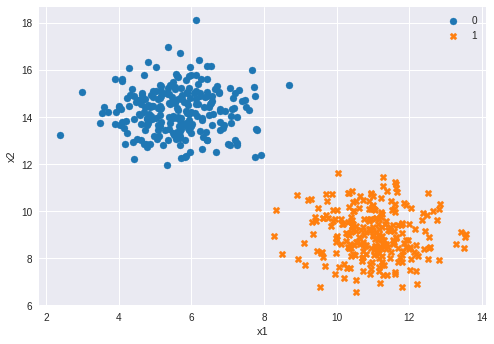

In [6]:
plt.scatter(x[:, 0][y == 0], x[:, 1][y == 0], color='tab:blue', marker='o', label="0")
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='tab:orange', marker='X', label="1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

Save the dataset in a csv

In [7]:
database_path = TASK_PATH + "simple_ml_task.csv"

In [8]:
df_dataset = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1], "y": y})
display(df_dataset.head())
df_dataset.to_csv(database_path, index=False)

,x1,x2,y
0,5.138928,14.075056,0
1,4.102911,15.627589,0
2,4.643420,15.047799,0
3,5.490184,13.305174,0
4,10.030510,11.612259,1


Split the whole dataset in train and test sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

Train a simple linear classifier

In [10]:
model = LinearModel(activation="sigmoid")
model.compile(optimizer="sgd", loss="mse", metrics="accuracy")

2021-10-26 17:45:39.289176: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-26 17:45:39.289208: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-26 17:45:39.289238: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Lenovo-ideapad): /proc/driver/nvidia/version does not exist
2021-10-26 17:45:39.289528: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.fit(x_train, y_train, epochs=epochs)

2021-10-26 17:45:39.366815: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
13/13 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 0.9550
Epoch 2/2
13/13 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9950


In [12]:
print("Train evaluation")
metrics_train = model.evaluate(x_train, y_train)
print("Test evaluation")
metrics_test = model.evaluate(x_test, y_test)

Train evaluation
13/13 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 1.0000
Test evaluation
4/4 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 1.0000


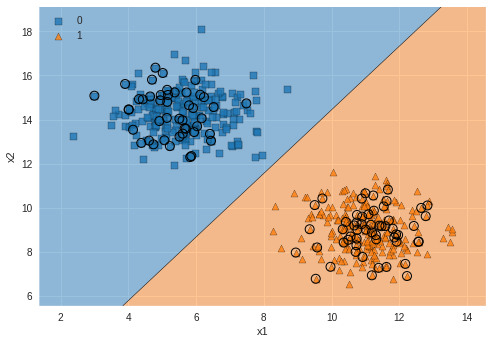

In [13]:
plot_decision_regions(x, y, clf=model, legend=2, X_highlight=x_test)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()